<em><strong><h5>EXERCISE 3 NATURAL LANGUAGE PROCESSING</h5></strong></em>

<strong>1. *EXPLORING WORD EMBEDDINGS*</strong>

In [1]:
import gensim.downloader as api
import json
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import transformers
import nltk
from nltk.util import ngrams
import re


In [2]:
glove_vectors = api.load("glove-wiki-gigaword-100")

In [3]:
set_words = ['computer', 'laptop', 'queen', 'king']
top5_similar_words = []
for word in set_words:
    top5_similar_words.append(glove_vectors.most_similar(word, topn=5))
print(top5_similar_words)

[[('computers', 0.8751983046531677), ('software', 0.8373122215270996), ('technology', 0.7642159461975098), ('pc', 0.7366448640823364), ('hardware', 0.7290390729904175)], [('laptops', 0.8518659472465515), ('computers', 0.7559927105903625), ('phones', 0.7229112386703491), ('portable', 0.7157840728759766), ('desktop', 0.7085692286491394)], [('princess', 0.7947244644165039), ('king', 0.7507690191268921), ('elizabeth', 0.7355712056159973), ('royal', 0.7065026164054871), ('lady', 0.7044796943664551)], [('prince', 0.7682329416275024), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775828361511), ('monarch', 0.6977890729904175)]]


In [4]:
vec1 = glove_vectors.get_vector('king') - glove_vectors.get_vector('man') + glove_vectors.get_vector('woman')
vec2 = glove_vectors.get_vector('vehicle') - glove_vectors.get_vector('computer') + glove_vectors.get_vector('laptop')

print(glove_vectors.most_similar(vec1, topn=5))
print(glove_vectors.most_similar(vec2, topn=5))

[('king', 0.8551837205886841), ('queen', 0.7834413647651672), ('monarch', 0.6933802366256714), ('throne', 0.6833109855651855), ('daughter', 0.680908203125)]
[('vehicle', 0.758844256401062), ('suv', 0.7331708073616028), ('minivan', 0.720077633857727), ('parked', 0.7133616805076599), ('jeep', 0.6985746622085571)]


Performing vector arithmetic on words using methods like word embeddings (in this case GloVe) allows us to capture semantic relationships between words. The resulting vector would ideally have a corresponding word but since it is not like this we have to use functions like most_similar to find the closest word to that. In the first example 'monarch' which funnily enough would be the perfect corresponding vector since it is a gender neutral word representing royalty.

<strong>2. *INVESTIGATING SOCIETAL BIASES*</strong>

In [5]:
professions = ['engineer', 'nurse', 'scientist']
names = ['james', 'emily', 'mohammed', 'ling', 'juan']
similarities = {}

for profession in professions:
    similarities[profession] = []
    for name in names:
        similarities[profession].append([name, float(glove_vectors.similarity(profession, name))])

json_dict = json.dumps(similarities, indent=3)
print(json_dict)

{
   "engineer": [
      [
         "james",
         0.43955788016319275
      ],
      [
         "emily",
         0.15777018666267395
      ],
      [
         "mohammed",
         0.258592814207077
      ],
      [
         "ling",
         0.11636736989021301
      ],
      [
         "juan",
         0.27362167835235596
      ]
   ],
   "nurse": [
      [
         "james",
         0.23846927285194397
      ],
      [
         "emily",
         0.36251455545425415
      ],
      [
         "mohammed",
         0.1562427282333374
      ],
      [
         "ling",
         0.20062392950057983
      ],
      [
         "juan",
         0.16719740629196167
      ]
   ],
   "scientist": [
      [
         "james",
         0.4182989299297333
      ],
      [
         "emily",
         0.23490199446678162
      ],
      [
         "mohammed",
         0.28646785020828247
      ],
      [
         "ling",
         0.2678428888320923
      ],
      [
         "juan",
         0.18118484

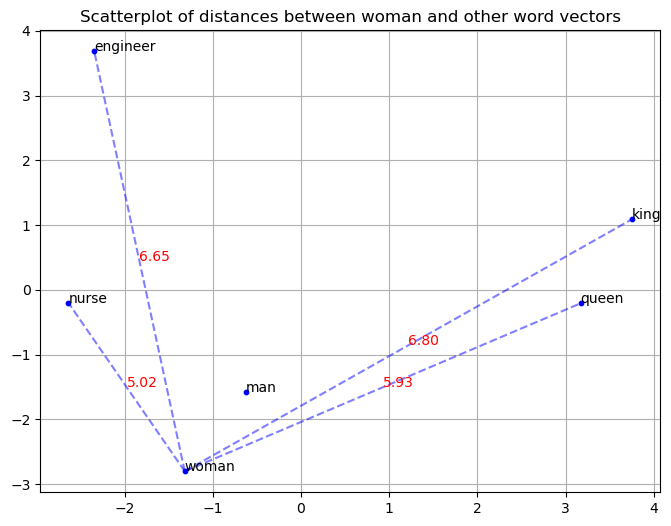

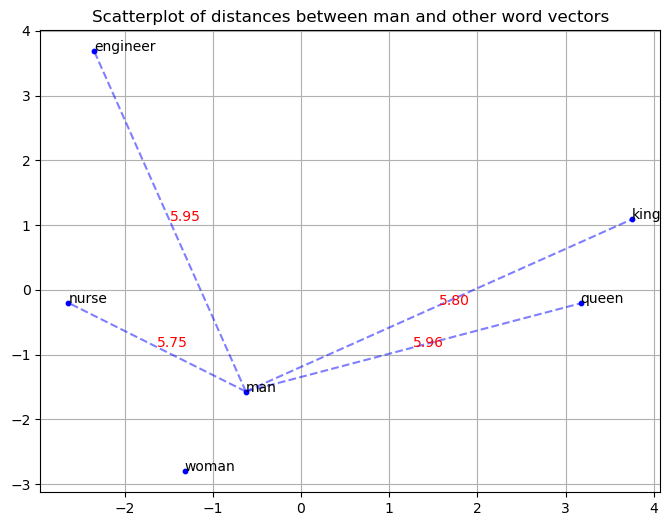

In [6]:
words = ["king", "queen", "man", "woman", "nurse", "engineer"]
word_vectors = np.array([glove_vectors[word] for word in words])

pca_model = PCA(n_components=2, random_state=42)
word_vectors_2d = pca_model.fit_transform(word_vectors)

professions = ["nurse", "engineer"]
non_professions = ["king", "queen", "woman"]


plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c='b', s=10)

#annotate points with word labels
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

woman_index = words.index("woman")
for word in words:
    if word != "woman" and word != "man":
        word_index = words.index(word)
        plt.plot([word_vectors_2d[woman_index, 0], word_vectors_2d[word_index, 0]], 
                 [word_vectors_2d[woman_index, 1], word_vectors_2d[word_index, 1]], 
                 color='blue', linestyle='--', alpha=0.5)
        
        distance = np.linalg.norm(word_vectors[woman_index] - word_vectors[word_index])
        
        # Annotate the line with the distance
        plt.annotate(f'{distance:.2f}', 
                     ((word_vectors_2d[woman_index, 0] + word_vectors_2d[word_index, 0]) / 2,
                      (word_vectors_2d[woman_index, 1] + word_vectors_2d[word_index, 1]) / 2),
                     color='red', fontsize=10, )

plt.title('Scatterplot of distances between woman and other word vectors')
plt.grid(True)
plt.show()

#lets do the same but for man

professions = ["nurse", "engineer"]
non_professions = ["king", "queen", "man"]

plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c='b', s=10)

#annotate points with word labels
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

man_index = words.index("man")
for word in words:
    if word != "woman" and word != "man":
        word_index = words.index(word)
        plt.plot([word_vectors_2d[man_index, 0], word_vectors_2d[word_index, 0]], 
                 [word_vectors_2d[man_index, 1], word_vectors_2d[word_index, 1]], 
                 color='blue', linestyle='--', alpha=0.5)
        
        distance = np.linalg.norm(word_vectors[man_index] - word_vectors[word_index])
        
        # Annotate the line with the distance
        plt.annotate(f'{distance:.2f}', 
                     ((word_vectors_2d[man_index, 0] + word_vectors_2d[word_index, 0]) / 2,
                      (word_vectors_2d[man_index, 1] + word_vectors_2d[word_index, 1]) / 2),
                     color='red', fontsize=10, )

plt.title('Scatterplot of distances between man and other word vectors')
plt.grid(True)
plt.show()

These two plots illustrate the influence of biases on word vectors and how they can perpetuate stereotypes. In the second plot, we see the vector for "engineer" biased towards the vector for 'man' radically differently than to the vector for 'woman', reflecting a stereotype where men are more commonly associated with this profession. This bias can negatively impact systems relying on word embeddings, reinforcing gender stereotypes and potentially leading to discriminatory outcomes. Recognizing and mitigating biases in word embeddings is crucial for developing fair and equitable AI systems that avoid perpetuating harmful stereotypes.

<strong>3. *DISCUSSION*</strong>

Some implications that these biases imply are:
- Reinforcing stereotypes: Word embeddings often reflect societal biases present in the data they are trained on. Historical data has shown that gender biases appear in different job roles. For example, we can see how the word 'man' is closer to 'engineer' than 'woman' is. This can lead to perpetuating stereotypes and discrimination in automated systems.
- Biased search results: In search engines, biased word embeddings can lead to biased search results. For example, if a user searches for 'engineer', a system relying on embeddings like this will prioritize male engineers over female engineers due to the bias present.
- Discriminatory Hiring Practices: In resume screening systems, biased word embeddings can lead to discriminatory hiring practices. If a system is trained on biased data, it may inadvertently favor candidates who fit certain demographic profiles encoded in the embeddings (i.e.: male candidates for engineering).
- Limited representation: Biases in word embeddings can also resul in limited representation of certain groups or concepts. For instance, if certain occupations are underrepresented in the training data, their corresponding word embeddings may not accurately capture the nuances of those occupations, leading to misinterpretation or exclusion in applications.
- Feedback loops: Finally, the biases present in word embeddings can create feedback loops where biased systems perpetuate and reinforce existing biases in society. For example, if a biased resumé screening system consistently selects candidates from certain demographic groups, it may further marginalize underrespresented groups.

<em><strong><h5>EXERCISE 4 NATURAL LANGUAGE PROCESSING</h5></strong></em>

1. Implement a method to predict the most likely next word for a given prefix by examining the last word in the prefix, and predicting the most likely next word, frequency wise (with regards to the given text corpus).

In [7]:
def tokenize_text(file):
    tokenized_text = []
    with open(file, 'r') as file:
        text = file.read()
        tokenized_text = re.findall(r"[\w']+|[.,!?;]", text.lower())
        words = [word for word in tokenized_text if word.isalpha()]
    return words

tokens = tokenize_text('text_corpus.txt')

vocab = len(set(tokens))
bigram_list = list(nltk.bigrams(tokens))

cfreq_sherlock_bigrams = nltk.ConditionalFreqDist(bigram_list)

cprob_sherlock_bigrams = nltk.ConditionalProbDist(cfreq_sherlock_bigrams, nltk.MLEProbDist)

prefixes = ['to', 'is', 'of']
for prefix in prefixes:
    print(f"Prefix: {prefix}")
    print(f"Next Probable word: {cprob_sherlock_bigrams[prefix].generate()}")
    print('-----------------------------------')

Prefix: to
Next Probable word: day
-----------------------------------
Prefix: is
Next Probable word: clear
-----------------------------------
Prefix: of
Next Probable word: the
-----------------------------------


In [8]:
trigram_list = nltk.trigrams(tokens)
condition_pairs = (((w0, w1), w2) for w0, w1, w2 in trigram_list)
cfreq_sherlock_trigrams = nltk.ConditionalFreqDist(condition_pairs)
cprob_sherlock_trigrams = nltk.ConditionalProbDist(cfreq_sherlock_trigrams, nltk.MLEProbDist)

cprob_sherlock_trigrams['is', 'the'].generate()

prefixes = [['me','to'], ['holmes', 'is'], ['mystery', 'of']]
for prefix in prefixes:
    print(f"Prefix: {prefix}")
    print(f"Next Probable word: {cprob_sherlock_trigrams[prefix[0], prefix[1]].generate()}")
    print('-----------------------------------')

Prefix: ['me', 'to']
Next Probable word: read
-----------------------------------
Prefix: ['holmes', 'is']
Next Probable word: it
-----------------------------------
Prefix: ['mystery', 'of']
Next Probable word: the
-----------------------------------


Implemented a bigram and a trigram model with nltk to predict word depending on the frequencies. From what we can see we can infer a few things, firstly that human language is complex and that longer ngrams tend to predict better than single unigrams, this is because human language is composed of very complex relationships between words, traces, and secondly that using 1, 2 or 3 words to determine the following word is quite undesiderable. Nonetheless, ngram models can be useful for several things but we do have to be careful on our use of them as they might be the better at making coherent predictions due to this lack of attention.

I could not manage to make the gpt-2 model work properly with the corpus data. I invested quite a lot of time but i kept getting this error "https://stackoverflow.com/questions/76448287/how-can-i-solve-importerror-using-the-trainer-with-pytorch-requires-accele" tried quite a lot but i still couldn't get it neither to work on my machine nor on the GColab, tried changing CPU environment to GPU rendering as i saw it suggested as a possible solution for it but to no avail. I understand if i get deducted points but I just wanted to clarify that i tried to make it work ;)

<em><strong><h5>EXERCISE 5 COMPUTER VISION</h5></strong></em> (Code for this exercise is in the .ipynb called "Code for exercise 5")

1) A plot containing the training and validation loss curves.

![title](loss_curves.png)

2. A plot showing the development of the training and validation accuracies throughout the training process.

![title](accuracy_curves.png)

3. Describe the plots created in steps above. Based on your observations, would you recommend changing the number of training epochs? If so, why?
 - The plots generated exhibit a trend whereby the performance metrics plateau or exhibit diminishing returns after approximately 250 epochs. This phenomenon is indicative of the model's transition towards learning the intricacies of the training data itself rather than generalizing to make accurate predictions on unseen data. Consequently, it suggests that further increasing the number of training epochs may not significantly improve the model's predictive capacity but may instead lead to overfitting.

4. Report the test accuracy of your model at the best validation loss and plot the confusion matrix on the test dataset.
- The best test accuracy at the best validation loss is: 0.859000027179718

***References***
- Chat GPT version 3.5 was used as a writing assistance tool.